In [74]:
import nltk 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
%matplotlib inline

In [75]:
#cleaning of data,will perfrom stemming
import warnings
warnings.filterwarnings("ignore")
import re
from nltk.corpus import stopwords
words = stopwords.words("english")

In [76]:
import os
os.chdir("C:\\Users\\Asus\\Desktop\\UPDATED_NLP_COURSE")

In [77]:
df = pd.read_excel("nD.xlsx")

In [78]:
#word2vec expects the daata to be a list of strings
#showing the dataset
df.drop_duplicates(keep='last',inplace=True)
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


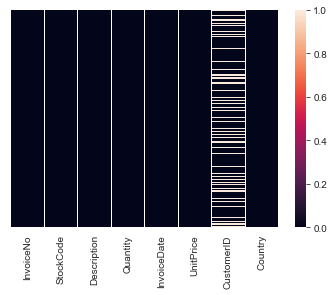

In [79]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(df.isnull(),yticklabels=False)
#since this a recommendation system we are not particularly concerned with the data loss along customer id

In [85]:
import random
df.dropna(inplace=True)
df['StockCode']= df['StockCode'].astype(str)
customers = df["CustomerID"].unique().tolist()    
random.shuffle(customers)
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]
train_df = df[df['CustomerID'].isin(customers_train)]
validation_df = df[~df['CustomerID'].isin(customers_train)]

In [86]:
#appending a list of list
from tqdm import tqdm
purchase_train = []
for i in tqdm(customers_train):
    temp  = train_df[train_df['CustomerID']==i]['StockCode'].tolist()
    purchase_train.append(temp)
    

100%|████████████████████████████████████████████████████████████████████████████| 3935/3935 [00:03<00:00, 1130.51it/s]


In [ ]:
import multiprocessing as mp
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10,
                 workers = mp.cpu_count(),
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)
model.build_vocab(purchase_train, progress_per=200)

model.train(purchase_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

In [ ]:
products  = df.groupby()
from sklearn.manifold import TNSE
        def tsne_plot(model):
            "Creates and TSNE model and plots it"
            labels = []
            tokens = []

            for word in model.wv.vocab:
                tokens.append(model[word])
                labels.append(word)

            tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
            new_values = tsne_model.fit_transform(tokens)

            x = []
            y = []
            for value in new_values:
                x.append(value[0])
                y.append(value[1])

            plt.figure(figsize=(16, 16)) 
            for i in range(len(x)):
                plt.scatter(x[i],y[i])
                plt.annotate(labels[i],
                             xy=(x[i], y[i]),
                             xytext=(5, 2),
                             textcoords='offset points',
                             ha='right',
                             va='bottom')
            plt.show()

tnse_plot(model)